# Mất cân bằng dữ liệu (imbalanced dataset)

Mất cân bằng dữ liệu là một trong những hiện tượng phổ biến của bài toán phân loại nhị phân (binary classification). Trong trường hợp tỷ lệ dữ liệu giữa 2 class là 50%:50% thì được coi là cân bằng. Khi có sự khác biệt trong phân phối giữa 2 classes, chẳng hạn 60%:40% thì dữ liệu có hiện tượng mất cân bằng. 

Hầu hết các bộ dữ liệu đều khó đạt được trạng thái cân bằng mà luôn có sự khác biệt về tỷ lệ giữa 2 classes. Đối với những trường hợp dữ liệu mất cân bằng nhẹ như tỷ lệ 60:40 thì sẽ không ảnh hưởng đáng kể tới khả năng dự báo của mô hình.

Tuy nhiên nếu hiện tượng mất cân bằng nghiêm trọng xảy ra, chẳng hạn như tỷ lệ 90:10 sẽ thường dẫn tới dự báo kém chính xác. Khi đó thước đo độ chính xác (accuracy) của mô hình cũng không có nhiều ý nghĩa trong việc đánh giá kết quả vì tỷ lệ này có thể đạt được rất cao mà không cần tới mô hình hồi qui. Trong mẫu ví dụ trên, một dự báo ngẫu nhiên đưa ra tất cả đều là nhóm đa số thì độ chính xác đã đạt được tới 90%. Do đó nếu lựa chọn độ chính xác làm thước đo thì chỉ số này thường rất cao và dễ khiến chúng ta ngộ nhận.

Trong trường hợp mẫu mất cân bằng ta cần phải điều chỉnh lại chỉ số đánh giá mô hình để đưa ra kết quả hợp lý hơn. Tôi sẽ trình bày các chỉ số thay thế cho độ chính xác qua bài viết này.

Mất cân bằng dữ liệu thường xảy ra đối với rất nhiều các bài toán như phân loại khác nhau trong thực tiễn như spam email, phát hiện gian lận, dự báo vỡ nợ, chuẩn đoán bệnh lý,....

Mất cân bằng dữ liệu thường dẫn tới dự báo kém chính xác trên nhóm thiểu số. Bởi đa phần kết quả dự báo ra thường thuộc về nhóm đa số. Trong khi tầm quan trọng của việc dự báo được chính xác một mẫu thuộc nhóm thiểu số lớn hơn nhiều so với dự báo mẫu thuộc nhóm đa số. Do đó sẽ cần những sự điều chỉnh thích hợp để mô hình đạt được một độ chính xác cao trên nhóm thiểu số.

Vậy trong tình huống xảy ra mất cân bằng nghiêm trọng ta nên đánh giá mô hình như thế nào? Có những phương pháp nào để đối phó với hiện tượng mất cân bằng mẫu nghiêm trọng? Mời các bạn tham khảo các giải pháp qua bài viết này.

# Tập dữ liệu

Để thuận lợi cho việc minh họa giải pháp, tôi sẽ xây dựng một mô hình trên bộ dữ liệu [gian lận thẻ tín dụng](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) và thực hiện các đánh giá đo lường mức độ cải thiện mô hình trước và sau khi áp dụng các điều chỉnh.

**Thông tin về bộ dữ liệu:**

Đây là bộ dữ liệu về thẻ hành vi gian lận trong 6 tháng đầu năm 2005 tại một ngân hàng thuộc Đài Loan. Bộ dữ liệu bao gồm 30000 các hợp đồng thuộc cả 2 nhóm là vỡ nợ và không vỡ nợ. Mẫu xảy ra hiện tượng mất cân bằng trầm trọng vì tỷ lệ `bình thường:vỡ nợ` là `23364:6636`. Chúng ta sẽ cùng xem những giải pháp đưa ra sẽ cải thiện kết quả của mô hình như thế nào.


**Thông tin trường:**

Trong bộ dữ liệu này chúng ta sẽ dự báo hành vi vỡ nợ của khách hàng trong tháng tới. Biến mục tiêu là default_payment_next_month (Yes = 1, No = 0).

Đầu vào của mô hình là 23 biến còn lại có ý nghĩa như bên dưới:
* ID: Mã số xác định hồ sơ vay. Mỗi một ID ứng với một quan sát duy nhất.
* LIMIT_BAL: Số dư tín dụng bao gồm cả cá nhân người vay và những người phụ thuộc trong gia đình. Đơn vị NT dolar.
* SEX: Giới tính (1 = Nam, 2 = Nữ).
* EDUCATION: Trình độ giáo dục (1 = tốt nghiệp trung học, 2 = đại học, 3 = trung học thông, 4 = khác).
* MARRIAGE: Trạng thái hôn nhân (1 = đã kết hôn, 2 = độc thân, 3 = khác)
* AGE: Độ tuổi.
* PAY_0 - PAY_6: Lịch sử trả nợ trong quá khứ theo tuần tự của tháng. PAY_6 là tháng xa nhất và PAY_0 là tháng gần nhất. Chỉ số lường cho repayment status được chia thành các hạng: -1 = Trả nợ đúng hạn; 1 = trả nợ chậm 1 tháng; 2= trả nợ chậm 2 tháng; ...; 9 = trả nợ chậm 9 tháng.
* BILL_AMT1 - BILL_AMT6: Tổng giá trị của bill. BILL_AMT1 là giá trị bill trong tháng gần nhất, tuần tự như thế cho đến giá trị bill trong tháng sau cùng là BILL_AMT6.
* PAY_AMT1 - PAY_AMT6: Số tiền của tháng trước đã thanh toán. PAY_AMT1 là tháng gần nhất cho đến PAY_AMT6 là tháng xa nhất.

# Phân chia tập train/val/dev/test

Tiếp theo để huấn luyện, lựa chọn và kiểm tra kết quả của mô hình chúng ta sẽ phân chia một cách ngẫu nhiên, không trùng lặp bộ dữ liệu thành các tập train/val/dev/test. Các bộ dữ liệu này có ý nghĩa và vai trò như sau:

* tập train: Dựa trên các biến input và target của tập train, ta sẽ huấn luyện mô hình phân loại vỡ nợ. Mô hình thu được sẽ được đánh giá ở những tập dữ liệu độc lập khác.
* tập val: Đây là tập dữ liệu có các trường tương tự như tập train nhưng không được đưa vào huấn luyện mô hình mà chỉ được sử dụng để đánh giá kết quả dự báo từ mô hình được huấn luyện từ tập train. Nếu mô hình có hiện tượng overfitting hoặc underfitting sẽ được phát hiện và tiến hành hiệu chỉnh.
* tập dev: Đây là tập dữ liệu có các trường cũng tương tự như tập train và val nhưng được dùng để đánh giá việc lựa chọn các siêu tham số (hyper parameters) cho các mô hình huấn luyện.
* tập test: Đây cũng là tập dữ liệu có các trường giống train, val, dev và được coi như những quan sát mới. Do đó được sử dụng để kiếm tra độ chính xác của mô hình khi áp dụng vào thực tiễn.

Các tập dữ liệu sẽ được lựa chọn ngẫu nhiên và không trùng lặp. Trong đó bộ dữ liệu train có tỷ lệ kích thước giữa `bình thường: vỡ nợ` là 10000:500, và val/dev/test đều là là 2000:100.

In [0]:
from google.colab import drive
import os
import pandas as pd

drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/Colab Notebooks/ImbalanceDataset'
os.chdir(path)
dataset = pd.read_csv('default_of_credit_card_clients.csv', header = 0, 
                      encoding='utf-8', engine='python')
print(dataset.shape)
dataset.info()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
(30000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 


Phân chia train/val/dev/test

In [0]:
import numpy as np

model_features = list(set(dataset.columns).difference({"ID", "default_payment_next_month"}))
target = ["default_payment_next_month"]
X = dataset[model_features]
y = dataset[target]

id_pos = np.where(y.values.reshape(-1) == 1)[0]
id_neg = np.where(y.values.reshape(-1) == 0)[0]

np.random.shuffle(id_pos)
np.random.shuffle(id_neg)

# Tập train:
id_train_neg = id_neg[:10000] 
id_train_pos = id_pos[:500]
id_train = np.concatenate((id_train_neg, id_train_pos), axis = 0)

# Tập val:
id_val_neg = id_neg[10000:12000]
id_val_pos = id_pos[500:600]
id_val = np.concatenate((id_val_neg, id_val_pos), axis = 0)

# Tập dev:
id_dev_neg = id_neg[12000:14000]
id_dev_pos = id_pos[600:700]
id_dev = np.concatenate((id_dev_neg, id_dev_pos), axis = 0)

# Tập test:
id_test_neg = id_neg[14000:16000]
id_test_pos = id_pos[700:800]
id_test = np.concatenate((id_test_neg, id_test_pos), axis = 0)

# khởi tạo dataset
data_train = dataset.iloc[id_train]
data_val = dataset.iloc[id_val]
data_dev = dataset.iloc[id_dev]
data_test = dataset.iloc[id_test] 

print('data train shape: ', data_train.shape)
print('data val shape: ', data_val.shape)
print('data dev shape: ', data_dev.shape)
print('data test shape: ', data_test.shape)

data train shape:  (10500, 25)
data val shape:  (2100, 25)
data dev shape:  (2100, 25)
data test shape:  (2100, 25)


## Thay đổi metric:

Như đã giải thích ở mục đầu tiên, khi hiện tượng mất cân bằng dữ liệu nghiêm trọng xảy ra thì việc sử dụng độ chính xác làm thước đo đánh giá hiệu quả mô hình thường không chuẩn chuẩn xác bởi hầu hết các mô hình đều đạt độ chính xác rất cao. Một mô hình ngẫu nhiên dự báo toàn bộ là nhãn đa số cũng sẽ mang lại kết quả gần bằng 100%. Khi đó ta có thể cân nhắc tới một số metrics thay thế, có khả năng tập trung đánh giá độ chính xác trên nhóm thiểu số, sẽ có ý nghĩa hơn đối với việc lựa chọn mô hình.

![](https://imgur.com/mqcSGn6.png)

**Hình 1:** Bảng cross table mô tả kết quả thống kê chéo giữa nhãn dự báo và ground truth. Ở đây Positive tương ứng với nhãn `1` và Negative tương ứng với nhãn `0`.

Từ bảng cross table ta dễ dàng hình dung được ý nghĩa của các chỉ số đó là:

* Precision: Mức độ dự báo chính xác trong những trường hợp được dự báo là nhãn Positive.

$$precision = \frac{TP}{TP+FP}$$

* Recall: Mức độ dự báo chuẩn xác những trường hợp là Positive trong những trường hợp thực tế là Positive.

$$Recall = \frac{TP}{TP+FN}$$

* F1-Score: Trung bình điều hòa giữa Precision và Recall. Đây là chỉ số thay thế lý tưởng cho accuracy khi mô hình có tỷ lệ mất cân bằng mẫu cao.

$$F1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}}$$

* Kappa-Score: Là chỉ số đo lường mức độ liên kết tin cậy (inter-rater reliability) cho các categories.

* Gini: Đo lường sự bất bình đẳng trong phân phối giữa Positive và Negative được dự báo từ mô hình.

* AUC: Biểu diễn mối quan hệ giữa độ nhạy (sensitivity) và độ đặc hiệu (specificity). Đánh giá khả năng phân loại good và bad được dự báo từ mô hình.

Trong bài này tôi sẽ sử dụng chỉ số `auc` và `f1 score` là 2 thước đo chính đánh giá mô hình.

# Xây dựng mô hình
## Thuật toán Random forest:
Bên dưới chúng ta sẽ sử dụng thuật toán random forest để huấn luyện mô hình. 

**Decision Tree**

Trước tiên để hiểu về thuật toán Random Forest ta cần hiểu khái niệm về cây quyết định (decision tree). 

![](https://imgur.com/IrNJg5x.png)

**Hình 2:** Sơ đồ cây quyết đinh. Các node là những hình tròn trắng. Các mũi tên liên kết các node với nhau được gọi là nhánh. Một cây quyết định sẽ xuất phát bắt đầu từ root node, sau đó rẽ nhánh tới các split node và trả ra kết quả phân phối xác suất cho quan sát tại leaf node. Rotine là đường đi liên kết các node với nhau bằng các nhánh.

Decision tree sẽ xây dựng một cây quyết định ngẫu nhiên dựa trên các node (các hình tròn trắng trên hình) và nhánh (các mũi tên trên hình). Đại diện cho mỗi node là một câu hỏi mà giá trị trả về là YES hoặc NO. Các nhánh sẽ có tác dụng kết nối các nodes để tạo ra một kịch bản đường đi (routine).

Node bắt đầu của cây quyết định là root node. Từ root node, mô hình sẽ xây dựng một câu hỏi lựa chọn. Tập các phương án có thể là toàn bộ các nhóm của biến category hoặc phương án YES/NO được tạo ra từ biến liên tục. Chẳng hạn trong hình vẽ các phương án của câu hỏi từ root node đó là `sunny` (nắng), `rainy` (mưa), `overcast` (u ám). Dựa trên lựa chọn của chúng ta mà từ root node sẽ rẽ nhánh đến các node mới được gọi là split node hoặc internal node. Chẳng hạn nếu lựa chọn nhánh kịch bản `sunny` thì sẽ rẽ tới internal node tiếp theo là `humidity`.

Tại các internal node, mô hình tiếp tục rẽ nhánh tới những internal node ở tầng thấp hơn tương ứng với các biến khác. Thứ tự các biến được lựa chọn là ngẫu nhiên. Quá trình rẽ nhánh được thực hiện liên tục cho đến khi mô hình đi đến node cuối cùng là leaf node. Tại node này không có nhánh nào được rẽ thêm và trả ra kết quả dự báo của cây quyết định. 

Tợp hợp các liên kết giữa các node được gọi là đường đi (routine). Nhãn của kết quả dự báo phụ thuộc vào phân phối xác suất các classes được tính toán theo đường đi từ root node đến leaf node.

**Random Forest**

![](https://imgur.com/7BEBZgi.png)

**Hình 3:** Kiến trúc mô hình random forest. Mô hình là một tập hợp của nhiều cây quyết định. Mỗi một cây quyết định sẽ trả ra một kết quả dự báo. Quyết định cuối cùng về nhãn của quan sát sẽ dựa trên nguyên tắc bầu cử đa số (Majority-Voting) trên toàn bộ các cây quyết định con. Ngoài ra mô hình cũng được chạy trên rất nhiều các sub-sample. Nếu một quan sát xuất hiện tại nhiều sub-sample thì sẽ thực hiện bầu cử đa số trên cả các cây quyết định của toàn bộ các sub-sample.

Random Forest là thuật toán thuộc lớp mô hình kết hợp (ensemble model). Kết quả của thuật toán dựa trên không chỉ từ một cây quyết định mà từ nhiều cây quyết định. Thuật toán sẽ xây dựng nhiều kịch bản cây quyết định khác nhau và mỗi một cây được sẽ được áp dụng trên nhiều mẫu dữ liệu con được lựa chọn ngẫu nhiên. Kết quả nhãn dự báo cho một quan sát được tổng hợp từ rất nhiều mô hình cây quyết định khác nhau và ta sẽ voting trên tập hợp các kết quả đó để quyết định nhãn cuối cùng.

Kết quả từ mô hình Random Forest được kết hợp từ nhiều mô hình con nên có độ tin cậy cao hơn. Do đó thường có kết quả dự báo chính xác hơn so với những mô hình phân loại tuyến tính như logistic hoặc linear regression.

Bên cạnh Random Forest thì Gradient Boosting và AdaBoost cũng là các mô hình thuộc lớp mô hình kết hợp thường được áp dụng và mang lại hiệu quả cao tại nhiều cuộc thi.

**Tham số của Random Forest:**

Sẽ có một vài kịch bản tham số được lựa chọn và dựa trên kiểm nghiệm từ tập dev, chúng ta quyết định lựa chọn bộ siêu tham số phù hợp nhất.

Có rất nhiều tham số trong một mô hình Random Forest, trong đó một số tham số chính được sử dụng để tunning mô hình là:

* **n_estimators**: Số lượng các trees trên một cây quyết định.
* **max_depth**: Độ sâu lớn nhất của một cây quyết định.
* **min_samples_split**: Số lượng mẫu tối thiểu cần thiết để phân chia một internal node. Nếu kích thước mẫu ở một internal node nhỏ hơn ngưỡng thì ta sẽ không rẽ nhánh internal node.
* **max_features**: Số lượng các features được xem xét khi tìm kiếm phương án phân chia tốt nhất. Mặc định là toàn bộ các features đầu vào.
* **class_weight**: Trọng số tương ứng với mỗi class. Mặc định là None, khi đó các class sẽ có mức độ quan trọng như nhau. Nếu lựa chọn `balance` các class sẽ được đánh trọng số tỷ lệ nghịch với tỷ trọng mẫu của chúng.
* **min_impurity_split**: Ngưỡng để dừng sớm (early stopping) quá trình phát triển của cây quyết định. Nó sẽ tiếp tục phân chia nếu độ vẩn đục (impurity) lớn hơn ngưỡng threshold, trái lại thì nó là node leaf.

Chúng ta sẽ có một số kịch bản mô hình như sau:

* Mô hình 1:

n_estimators=100, 

max_depth=5, 

min_samples_split=200, 

class_weight=None,

max_features=10

* Mô hình 2: 

n_estimators=500, 

max_depth=10, 

min_samples_split=400,

max_features="auto" 

class_weight="balanced"

max_features = 20

* Mô hình 3: 

n_estimators=800, 

max_depth=10, 

min_samples_split=200,

max_features="sqrt" 

class_weight="balanced"



In [0]:
import numpy as np
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score
import matplotlib.pyplot as plt

model1 = RandomForestClassifier(n_estimators=100,
                                max_depth=5,
                                min_samples_split=200,
                                class_weight=None,
                                max_features=10)

model2 = RandomForestClassifier(n_estimators=500, 
                                max_depth=10, 
                                min_samples_split=400, 
                                random_state=12, 
                                class_weight="balanced",
                                max_features="auto")

model3 = RandomForestClassifier(n_estimators=800, 
                                max_depth=10, 
                                min_samples_split=200, 
                                random_state=12, 
                                class_weight="balanced",
                                max_features="sqrt")

def _tunning_model(model , X_train, y_train, X_dev, y_dev):
  model.fit(X_train, y_train)
  model_predictions = model.predict_proba(X_dev)
  model_roc_score = roc_auc_score(y_dev, 
                                  model_predictions[:,1])
  return model, model_roc_score

model1, model1_roc_score = _tunning_model(model1, 
                                          data_train[model_features], data_train['default_payment_next_month'],
                                          data_dev[model_features], data_dev['default_payment_next_month'])
print('model 1 ROC score on dev dataset: ', model1_roc_score)


model2, model2_roc_score = _tunning_model(model2, 
                                          data_train[model_features], data_train['default_payment_next_month'],
                                          data_dev[model_features], data_dev['default_payment_next_month'])
print('model 2 ROC score on dev dataset: ', model2_roc_score)

model3, model3_roc_score = _tunning_model(model3, 
                                          data_train[model_features], data_train['default_payment_next_month'],
                                          data_dev[model_features], data_dev['default_payment_next_month'])
print('model 3 ROC score on dev dataset: ', model3_roc_score)

model 1 ROC score on dev dataset:  0.7648699999999999
model 2 ROC score on dev dataset:  0.7681
model 3 ROC score on dev dataset:  0.768555


Như vậy bằng kiểm tra trên tập dev set cho thấy mô hình 2 sẽ có kết quả tốt nhất. Do đó ta sẽ coi mô hình 2 như một model baseline và các siêu tham số của nó sẽ được giữ để khởi tạo các mô hình về sau.

## Under sampling

Under sampling là việc ta giảm số lượng các quan sát của nhóm đa số để nó trở nên cân bằng với số quan sát của nhóm thiểu số. Ưu điểm của under sampling là làm cân bằng mẫu một cách nhanh chóng, dễ dàng tiến hành thực hiện mà không cần đến thuật toán giả lập mẫu. 

Tuy nhiên nhược điểm của nó là kích thước mẫu sẽ bị giảm một cách trầm trọng. Gỉa sử nhóm thiểu số của chúng ta có kích thước là 500, như vậy để tạo ra sự cân bằng mẫu giữa nhóm đa số và thiểu số sẽ cần giảm kích thước mẫu của nhóm đa số từ 10000 về 500. Tổng kích thước tập huấn luyện sau khi under sampling là 1000 và chiếm khoảng 1/10 so với kích thước tập huấn luyện ban đầu. Đây là tập huấn luyện rất nhỏ, không đại diện cho phân phối của toàn bộ tập dữ liệu và thường dễ dẫn tới hiện tượng overfitting.

Do đó trong một số phương án, chúng ta có thể không nhất thiết lựa chọn sao cho tỷ lệ mẫu giữa `nhóm đa số: nhóm thiểu số` là `50%:50%` mà có thể giảm dần xuống về `80%:20%`, `70%:30%` hoặc `60%:40%` và tìm ra phương án nào mang lại hiệu quả dự báo tốt nhất trên tập kiểm tra.

Bên dưới ta sẽ xây dựng mô hình trên 2 tỷ lệ mẫu `80%:20%` và `70%:30%` và đánh giá mô hình trên tập test.

In [0]:
# Phân chia mẫu ngẫu nhiên theo tỷ lệ 80%:20% bằng cách giữ lại 2000 mẫu ngẫu nhiên từ tập train
np.random.shuffle(id_train_neg)
id_train_neg_80_20 = id_train_neg[:2000]
id_train_80_20 = np.concatenate((id_train_neg_80_20, id_train_pos), axis = 0)

# Phân chia mẫu ngẫu nhiên theo tỷ lệ 70%:30% bằng cách giữ lại 1166 mẫu ngẫu nhiên từ tập train
np.random.shuffle(id_train_neg)
id_train_neg_70_30 = id_train_neg[:1166]

id_train_70_30 = np.concatenate((id_train_neg_70_30, id_train_pos), axis = 0) 

# khởi tạo dataset
data_train_80_20 = dataset.iloc[id_train_80_20]
data_train_70_30 = dataset.iloc[id_train_70_30]

In [0]:
# Huấn luyện mô hình trên mẫu tỷ lệ 80%:20%
model2_unsam_80_20 = RandomForestClassifier(n_estimators=500, 
                                            max_depth=10, 
                                            min_samples_split=400, 
                                            random_state=12, 
                                            class_weight="balanced",
                                            max_features="auto")

model2_unsam_80_20.fit(data_train_80_20[model_features], data_train_80_20['default_payment_next_month'])
model_predictions = model2_unsam_80_20.predict_proba(data_test[model_features])
model_pred_label = model2_unsam_80_20.predict(data_test[model_features]) 
model_roc_score = roc_auc_score(data_test['default_payment_next_month'], model_predictions[:,1])
model_f1_score = f1_score(data_test['default_payment_next_month'], model_pred_label)
print('model2_unsam_80_20 roc score on test: ', model_roc_score)
print('model2_unsam_80_20 f1 score on test: ', model_f1_score)

# Huấn luyện mô hình trên mẫu tỷ lệ 70%:30%
model2_unsam_70_30 = RandomForestClassifier(n_estimators=500, 
                                            max_depth=10, 
                                            min_samples_split=400, 
                                            random_state=12, 
                                            class_weight="balanced",
                                            max_features="auto")

model2_unsam_70_30.fit(data_train_70_30[model_features], data_train_70_30['default_payment_next_month'])
model_predictions = model2_unsam_70_30.predict_proba(data_test[model_features])
model_pred_label = model2_unsam_70_30.predict(data_test[model_features]) 
model_roc_score = roc_auc_score(data_test['default_payment_next_month'], model_predictions[:,1])
model_f1_score = f1_score(data_test['default_payment_next_month'], model_pred_label)
print('model2_unsam_70_30 roc score on test: ', model_roc_score)
print('model2_unsam_70_30 f1 score on test: ', model_f1_score)

model2_unsam_80_20 roc score on test:  0.7702749999999998
model2_unsam_80_20 f1 score on test:  0.19999999999999998
model2_unsam_70_30 roc score on test:  0.7649575000000001
model2_unsam_70_30 f1 score on test:  0.1949778434268833


Dự báo mô hình trên tập test và tính toán các chỉ số `auc` và `f1 score`.

In [0]:
model_predictions = model2.predict_proba(data_test[model_features])
model_pred_label = model2.predict(data_test[model_features]) 
model_roc_score = roc_auc_score(data_test['default_payment_next_month'], model_predictions[:,1])
model_f1_score = f1_score(data_test['default_payment_next_month'], model_pred_label)
print('random forest roc score on test: ', model_roc_score)
print('random forest f1 score on test: ', model_f1_score)

random forest roc score on test:  0.77301
random forest f1 score on test:  0.21946902654867256


So sanh kết quả cho ta thấy khi thực hiện under sampling đã không giúp cải thiện được nhiều kết quả dự báo trên tập test ở cả 2 chỉ số `auc` và `f1 score`. Nguyên nhân có thể là do việc thực hiện over sampling đã dẫn tới overfitting. Chúng ta cần thử nghiệm với nhiều tỷ lệ mẫu khác nhau hơn để tìm ra tỷ lệ phù hợp. Phần này xin dành cho bạn đọc.

## Over sampling

Over sampling là các phương pháp giúp giải quyết hiện tượng mất cân bằng mẫu bằng cách gia tăng kích thước mẫu thuộc nhóm thiểu số bằng các kĩ thuật khác nhau. Có 2 phương pháp chính để thực hiện over sampling đó là:

* Lựa chọn mẫu có tái lập.
* Mô phỏng mẫu mới dựa trên tổng hợp của các mẫu cũ.

Chúng ta cùng tìm hiểu cụ thể các phương pháp này ở phần bên dưới.


### Naive random over-sampling

Naive random Over sampling là phương pháp tái chọn mẫu dựa trên giả thuyết ngây ngô là dữ liệu của mẫu mới sẽ hoàn toàn giống dữ liệu sẵn có. Do đó ta sẽ chọn mẫu bằng cách lựa chọn ngẫu nhiên có lặp lại các quan sát thuộc nhóm thiểu số. 

Do lựa chọn dữ liệu có lặp lại nên các quan sát thu được sau naive random over-sampling chính là những quan sát thực tế và đánh giá dược đúng bản chất dữ liệu.

Bên dưới ta sẽ lựa chọn Naive random over-sampling sao cho tỷ lệ mẫu thuộc nhóm thiểu số và nhóm đa số là bằng 1. Sau đó huấn luyện model trên tập mẫu đã được over sampling và kiểm tra kết quả trên tập test. So sánh với kết quả từ mô hình baseline để đánh giá phương pháp over sampling có giúp cải thiện hiệu năng dự báo hay không?

In [0]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.base import BaseSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
model_smote = RandomForestClassifier(n_estimators=500, 
                                max_depth=10, 
                                min_samples_split=400, 
                                random_state=12, 
                                class_weight="balanced",
                                max_features="auto")

pipe = make_pipeline(RandomOverSampler(sampling_strategy=1, random_state=0), model_smote)
pipe.fit(data_train[model_features], data_train['default_payment_next_month'])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('randomoversampler',
                 RandomOverSampler(random_state=0, ratio=None,
                                   return_indices=False, sampling_strategy=1)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=10,
                                        max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=400,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
          

Dự báo và kiểm định trên test

In [0]:
model_smote_predictions = pipe.predict_proba(data_test[model_features])
model_smote_pred_label = pipe.predict(data_test[model_features]) 
model_smote_roc_score = roc_auc_score(data_test['default_payment_next_month'], model_smote_predictions[:,1])
model_smote_f1_score = f1_score(data_test['default_payment_next_month'], model_smote_pred_label)
print('random forest roc score on test: ', model_smote_roc_score)
print('random forest f1 score on test: ', model_smote_f1_score)

random forest roc score on test:  0.7825150000000001
random forest f1 score on test:  0.2565217391304348


In [0]:
model_predictions = model2.predict_proba(data_test[model_features])
model_pred_label = model2.predict(data_test[model_features]) 
model_roc_score = roc_auc_score(data_test['default_payment_next_month'], model_predictions[:,1])
model_f1_score = f1_score(data_test['default_payment_next_month'], model_pred_label)
print('random forest roc score on test: ', model_roc_score)
print('random forest f1 score on test: ', model_f1_score)

random forest roc score on test:  0.782075
random forest f1 score on test:  0.245398773006135


Như vậy ta thấy rằng khi sử dụng phương pháp random over sampling mẫu sẽ giúp cải thiện được đáng kể kết quả dự báo. Chỉ số `auc` tăng lên từ:
`0.7820` trên tập test lên `0.7825` và chỉ số `f1 score` tăng từ `0.2454` lên `0.2565`.

### SMOTE & ADASYN

SMOTE (Synthetic Minority Over-sampling) và ADASYN (Adaptive synthetic sampling) là các phương pháp sinh mẫu nhằm gia tăng kích thước mẫu của nhóm thiểu số trong trường hợp xảy ra mất cân bằng mẫu. Quá trình gia tăng kích thước mẫu sẽ dựa trên một tổ hợp tuyến tính của các mẫu láng giềng gần nhất với các quan sát thuộc mẫu thiểu số để tạo ra kết quả khái quát nhất. Phương pháp để lựa chọn ra các láng giềng của một quan sát có thể dựa trên thuật toán `kNN` hoặc `SVM`.

Chi tiết các thuật toán này tôi sẽ không trình bày tại đây. Các bạn có thể tham khảo tại [Synthetic Minority Over-sampling](https://arxiv.org/pdf/1106.1813.pdf) và [Adasyn adaptive synthetic](https://towardsdatascience.com/adasyn-adaptive-synthetic-sampling-method-for-imbalanced-data-602a3673ba16).

Bên dưới ta sẽ cùng áp dụng phương pháp over-sampling từ SMOTE và ADASYN và kiểm tra kết quả dự báo của mô hình được huấn luyện trên mẫu over-sampling.

In [0]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import (SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC)
from imblearn.over_sampling import RandomOverSampler
from imblearn.base import BaseSampler

rf_clf = RandomForestClassifier(n_estimators=500, 
                                max_depth=10, 
                                min_samples_split=400, 
                                random_state=12, 
                                class_weight="balanced",
                                max_features="auto")

smotes = {0 : 'SMOTE',
          1 : 'BorderlineSMOTE',
          2 : 'SVMSMOTE',
          3 : 'ADASYN'}


for i, sampler in enumerate((SMOTE(sampling_strategy = 1, random_state=0),
                BorderlineSMOTE(sampling_strategy = 1, random_state=0, kind='borderline-1'),
                SVMSMOTE(sampling_strategy = 1, random_state=0),
                ADASYN(sampling_strategy = 1, random_state=0))):
    pipe_line = make_pipeline(sampler, rf_clf)
    pipe_line.fit(data_train[model_features], data_train['default_payment_next_month'])
    rf_predictions = pipe_line.predict_proba(data_test[model_features])
    rf_pred_label = pipe_line.predict(data_test[model_features]) 
    rf_roc_score = roc_auc_score(data_test['default_payment_next_month'], rf_predictions[:,1])
    rf_f1_score = f1_score(data_test['default_payment_next_month'], rf_pred_label)
    print('------------------------------------------------')
    print('SMOTE method: ', smotes[i])
    print('random forest roc score on test: ', rf_roc_score)
    print('random forest f1 score on test: ', rf_f1_score)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


------------------------------------------------
SMOTE method:  SMOTE
random forest roc score on test:  0.71945
random forest f1 score on test:  0.2255965292841649


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


------------------------------------------------
SMOTE method:  BorderlineSMOTE
random forest roc score on test:  0.767965
random forest f1 score on test:  0.2519280205655527


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

------------------------------------------------
SMOTE method:  SVMSMOTE
random forest roc score on test:  0.776185
random forest f1 score on test:  0.28387096774193554


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


------------------------------------------------
SMOTE method:  ADASYN
random forest roc score on test:  0.71786
random forest f1 score on test:  0.21940928270042193


Như vậy ta thấy có 2 phương pháp SMOTE là `SVMSMOTE` và `BorderlineSMOTE` đã giúp tăng chỉ số `f1` score so với mô hình baseline. Trong đó phương pháp `SVMSMOTE` có mức độ cải thiện f1 score là gần 4% từ `0.2454` lên `0.2839`. Trong khi f1 score thay đổi không đáng kể. Đây là cải thiện rất tốt đối với một mô hình mà hầu hết kết quả của `f1` chỉ xoay quanh khoảng từ `0.24-0.25`. 

## Thu thập thêm dữ liệu

Thông thường với các mô hình mà số lượng quan sát trong mẫu thiểu quá nhỏ sẽ không đại diện cho toàn bộ các trường hợp của `vỡ nợ`. Để mô hình học được bao quát hơn các khả năng, chúng ta cần gia tăng kích thước mẫu thiểu bằng cách thu thập thêm các quan sát trên thực tế thuộc nhóm thiểu. 

Ví dụ, giả sử ta lấy thêm 500 quan sát thuộc nhóm thiểu số vào tập train. Các quan sát này phải thỏa mãn điều kiện chưa từng xuất hiện ở các mẫu của tập test. Bởi vì về nguyên tắc, khi đánh giá mô hình, chúng ta không được lấy mẫu đã được huấn luyến để kiểm tra mô hình.

Như vậy ta sẽ có một tập dữ liệu mới gọi là `data_train_add` có 10000 mẫu thông thường và 1000 mẫu vỡ nợ. Cùng xây dựng mô hình và kiểm tra trên tập test.


In [0]:
# Tập train:
id_train_neg = id_neg[:10000] 
id_train_pos = id_pos[:500]
# Lấy ngẫu nhiên 500 quan sát thuộc nhóm thiểu không trùng với test
id_train_pos_add = id_pos[800:1300]
id_train_add = np.concatenate((id_train_neg, id_train_pos, id_train_pos_add), axis = 0)

# khởi tạo dataset
data_train_add = dataset.iloc[id_train_add]
print('data train shape: ', data_train_add.shape)

data train shape:  (11000, 25)


In [0]:
model_add = RandomForestClassifier(n_estimators=800, 
                                max_depth=10, 
                                min_samples_split=200, 
                                random_state=12, 
                                class_weight="balanced",
                                max_features="sqrt")

model_add.fit(data_train_add[model_features], data_train_add['default_payment_next_month'])
model_add_predictions = model_add.predict_proba(data_test[model_features])
model_add_pred_label = model_add.predict(data_test[model_features]) 
model_add_roc_score = roc_auc_score(data_test['default_payment_next_month'], model_add_predictions[:,1])
model_add_f1_score = f1_score(data_test['default_payment_next_month'], model_add_pred_label)
print('random forest roc score on test: ', model_add_roc_score)
print('random forest f1 score on test: ', model_add_f1_score)

random forest roc score on test:  0.79414
random forest f1 score on test:  0.2629310344827586


Như vậy ta nhận thấy thu thập thêm dữ liệu cho nhóm thiểu số cũng là một phương án cải thiện khả năng dự báo so với model baseline, chỉ số `auc` và `f1 score` đều tăng.

## Thu thập thêm biến

Mô hình có kết quả kém có thể là do dữ liệu đang thiếu những biến quan trọng có ảnh hưởng lớn tới hành vi của nhóm thiểu số. Chẳng hạn đối với bài toán dự báo khả năng vỡ nợ, chúng ta có thể thu thập thêm dữ liệu về lịch sử tín dụng của khách hàng trên toàn bộ hệ thống ngân hàng để kiểm tra xem liệu khách hàng có đang vay vốn tại các ngân hàng khác không và khách hàng đã từng phát sinh nợ quá hạn chưa?

Có nhiều biến đầu vào quan trọng không dễ dàng nhận biết nếu data scientist không có hiểu biết về lĩnh vực đó. Do đó hiểu biết lĩnh vực (knownledge domain) rất quan trọng đối với mọi data scientist trước khi xây dựng mô hình. Để bổ sung thêm biến, chúng ta có thể xin ý kiến chuyên gia trong lĩnh vực mà ta đang phân loại. Các chuyên gia là người có kinh nghiệm lâu năm và có hiểu biết sâu sắc về đặc tính của các nhóm. Do đó họ sẽ đưa ra nhiều rules nhận diện và các biến quan trọng giúp ích cho phân loại.

## Phạt mô hình

Việc dự báo sai một quan sát thuộc mẫu đa số sẽ ít nghiêm trọng hơn so với dự báo sai một quan sát thuộc mẫu thiểu số. Xuất phát từ ý tưởng đó chúng ta sẽ phạt nặng hơn đối với sai số dự báo thuộc nhóm thiểu bằng cách gán cho nó một trọng số lớn hơn trong công thức của hàm loss function. Chẳng hạn như bên dưới trong argument `class_weight` chúng ta sẽ gán cho các trọng số của class thiểu số nhãn `1` là giá trị 0.9 và class đa số nhãn `0` là 0.1. Khi đó kết quả mô hình thu được trên tập test sẽ là:

In [0]:
model_pen = RandomForestClassifier(n_estimators=500, 
                                max_depth=10, 
                                min_samples_split=400, 
                                random_state=12, 
                                class_weight={0: 0.1,
                                              1: 0.9},
                                max_features="auto")

model_pen.fit(data_train[model_features], data_train['default_payment_next_month'])
model_pen_predictions = model_pen.predict_proba(data_test[model_features])
model_pen_pred_label = model_pen.predict(data_test[model_features]) 
model_pen_roc_score = roc_auc_score(data_test['default_payment_next_month'], model_pen_predictions[:,1])
model_pen_f1_score = f1_score(data_test['default_payment_next_month'], model_pen_pred_label)
print('random forest roc score on test: ', model_pen_roc_score)
print('random forest f1 score on test: ', model_pen_f1_score)

random forest roc score on test:  0.784845
random forest f1 score on test:  0.3092105263157895


Ta thấy cả `auc` và `f1 score` đều cao hơn so với baseline model. Trong đó `f1` đã tăng gần 6% từ `0.2454` lên tới `0.3`. Đây là kết quả khả quan nhất trong các mô hình từ trước đến nay.

## Thử nghiệm nhiều phương pháp khác nhau.

Quá trình thực nghiệm cho thấy mỗi một thuật toán sẽ có kết quả tốt đối với mỗi một bộ dữ liệu khác nhau. Có thuật toán cho kết quả tốt trên các bộ dữ liệu mất cân bằng nghiêm trọng nhưng kém hiệu quả trên các bộ dữ liệu không bị mất cân bằng. Do đó điều chúng ta không nên tin tưởng vào một thuật toán mà phải mở rộng và thử nghiệm mô hình trên nhiều thuật toán khác nhau.

Bên dưới chúng ta cùng lần lượt hồi qui mô hình với các thuật toán và kiểm tra mức độ dự báo chính xác trên tập test.

**Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.0001)

def _train_and_test(model, algo):
  model.fit(data_train[model_features], data_train['default_payment_next_month'])
  predictions = model.predict_proba(data_test[model_features])
  pred_label = model.predict(data_test[model_features]) 
  roc_score = roc_auc_score(data_test['default_payment_next_month'], predictions[:,1])
  model_f1_score = f1_score(data_test['default_payment_next_month'], pred_label)
  print('{} roc score on test: {}'.format(algo , roc_score))
  print('{} f1 score on test: {}'.format(algo, model_f1_score))
  return model

log_reg = _train_and_test(log_reg, algo = 'Logistic')

Logistic roc score on test: 0.6628700000000001
Logistic f1 score on test: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**kNN**

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 5, 
                                      weights = 'distance',
                                      algorithm = 'kd_tree',
                                      metric = 'minkowski'
                                      )

knn_classifier = _train_and_test(knn_classifier, algo = 'kNN')

kNN roc score on test: 0.5585575
kNN f1 score on test: 0.0


**SVM**

In [0]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

svm_classifier = LinearSVC(penalty='l2', 
                           loss='squared_hinge',
                           tol=0.0001,
                           C=0.9,
                           dual=False,
                           class_weight='balanced',
                           max_iter=1000
                          )
svm_classifier = CalibratedClassifierCV(svm_classifier) 
svm_classifier = _train_and_test(svm_classifier, algo = 'SVM')

SVM roc score on test: 0.71934
SVM f1 score on test: 0.03773584905660377


**MLP**

In [0]:
data_train.shape

(10500, 25)

In [0]:
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# # concate nate all layers
# encode_els = concatenate(encode_els) 
inputlayer = Input(shape=(23,))
hidden1 = Dense(units = 128, kernel_initializer = 'normal', activation = 'relu')(inputlayer)
droplayer1 = Dropout(0.8)(hidden1)
hidden2 = Dense(64, kernel_initializer = 'normal', activation = 'relu')(droplayer1)
droplayer2 = Dropout(0.2)(hidden2)
outputlayer = Dense(1, kernel_initializer = 'normal', activation = 'sigmoid')(droplayer2)
mlp_classifier = Model(inputs = inputlayer, outputs = [outputlayer])
mlp_classifier.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 23)]              0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               3072      
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_27 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 65        
Total params: 11,393
Trainable params: 11,393
Non-trainable params: 0
______________________________________________________

In [0]:
optimizer = Adam()
mlp_classifier.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])
mlp_classifier.fit(data_train[model_features], data_train['default_payment_next_month'],
                   validation_data = (data_val[model_features], data_val['default_payment_next_month']),
                   epochs = 10,
                   batch_size = 64)

Train on 10500 samples, validate on 2100 samples
Epoch 1/10
10500/10500 [==============================] - 1s 90us/sample - loss: 0.4324 - acc: 0.9504 - val_loss: 0.1956 - val_acc: 0.9524
Epoch 2/10
10500/10500 [==============================] - 0s 44us/sample - loss: 0.6002 - acc: 0.9515 - val_loss: 0.1946 - val_acc: 0.9524
Epoch 3/10
10500/10500 [==============================] - 0s 42us/sample - loss: 0.3891 - acc: 0.9515 - val_loss: 0.1997 - val_acc: 0.9524
Epoch 4/10
10500/10500 [==============================] - 0s 43us/sample - loss: 0.3764 - acc: 0.9516 - val_loss: 0.1916 - val_acc: 0.9524
Epoch 5/10
10500/10500 [==============================] - 0s 42us/sample - loss: 0.2243 - acc: 0.9517 - val_loss: 0.1958 - val_acc: 0.9524
Epoch 6/10
10500/10500 [==============================] - 0s 43us/sample - loss: 0.3493 - acc: 0.9514 - val_loss: 0.1917 - val_acc: 0.9524
Epoch 7/10
10500/10500 [==============================] - 0s 42us/sample - loss: 0.3474 - acc: 0.9520 - val_loss: 0.1

In [0]:
predictions = mlp_classifier.predict(data_test[model_features])
pred_label = [0 if prob <= 0.5 else 1 for prob in predictions]
roc_score = roc_auc_score(data_test['default_payment_next_month'], predictions)
model_f1_score = f1_score(data_test['default_payment_next_month'], pred_label)
print('{} roc score on test: {}'.format('MLP' , roc_score))
print('{} f1 score on test: {}'.format('MLP', model_f1_score))

MLP roc score on test: 0.515965
MLP f1 score on test: 0.0


**Light Gradient Boosting**

In [0]:
import lightgbm as lgb

lgb_classifier = lgb.LGBMClassifier(n_estimator = 800, 
                                    objective = 'binary', 
                                    class_weight = 'balanced',
                                    learning_rate = 0.05,
                                    reg_alpha = 0.1,
                                    reg_lambda = 0.1,
                                    subsample = 0.8,
                                    n_job = -1,
                                    random_state = 12
                                   )

lgb_classifier = _train_and_test(lgb_classifier, algo = 'Light Gradient Boosting')

Light Gradient Boosting roc score on test: 0.7818150000000001
Light Gradient Boosting f1 score on test: 0.25654450261780104


Ta thấy hầu hết các mô hình đều không hoạt động tốt trên dữ liệu imbalance. Một số mô hình dự báo trên tập test chỉ rơi vào 1 nhóm dẫn tới `f1` = 0 như mô hình kNN, MLP, Logistic.

Tuy nhiên, mô hình `Light Gradient Boosting` lại cho kết quả dự báo khá tốt khi cải thiện được cả 2 chỉ số `auc` và `f1` so với baseline model. Thực tế tôi từng xây dựng nhiều mô hình có hiện tượng mất cân bằng dữ liệu nghiêm trọng, và kết quả cho thấy `Light Gradient Boosting` là mô hình có hiệu quả cao trong nhiều bài toán của tôi.

## Calibration

Đường curve ở trên cho thấy đầu ra của xác suất từ mô hình Random Forest có thể được hưởng lợi từ calibration.

**Làm thế nào để xác định một phương pháp calibration tốt**?

Một thuật ngữ đơn giản, xác suất có thể được diễn tả như một khoảng tin cậy. Thêm vào đó, một thuật toán classifier được cho rằng đưa ra một calibrated xác suất tốt nếu các điểm dữ liệu nhận xác suất là 0.5, 50% của những điểm dữ liệu này thuộc về class positive.

**Có 2 phương pháp phổ biến cho calibrate xác suất:**

**1. Platt Scaling:** aka logistic calibration là cách tiếp cận tham số với hàm sigmoid map giả định rằng mỗi class sẽ phân phối chuẩn hóa. Theo nghĩa đơn giản, phương pháp này huấn luyện mô hình logistic để phù hợp với xác suất ở output và tạo ra một điều chỉnh xác suất hợp lý hơn.

Ưu điểm: Làm việc tốt với tập dữ liệu nhỏ

Nhược điểm: Có thể tạo ra một hiệu chỉnh xác suất nếu giả thuyết không được giữ vững.

**2. Isotonic Regression:** Đây là cách tiếp cận phi tham số hướng tới biểu diễn khi nó fit tốt với các piece wise non-decrease function để dự báo xác suất đầu ra bởi một base model.

Ưu điểm: Không tạo ra một giả thuyết về phân phối xác suất của input.

Nhược điểm: Yêu cầu nhiều dữ liệu hơn để làm việc.

Bên dưới ta sẽ sử dụng phương pháp _Platt Scaling_ để tinh chỉnh xác suất của chúng ta.

In [0]:
calib_clf = CalibratedClassifierCV(rf_clf, method="sigmoid", cv="prefit")
calib_clf.fit(x_valid, y_valid)
calibrated_predictions = calib_clf.predict_proba(x_test)
calib_roc_score = roc_auc_score(y_test, calibrated_predictions[:, 1])
print(calib_roc_score)

0.7719709946699864


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


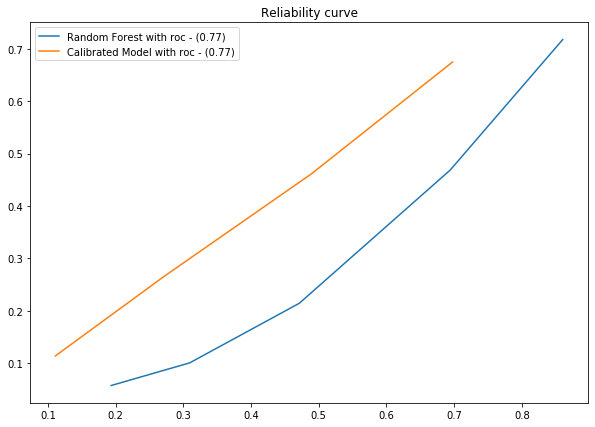

In [0]:
fig = plt.figure(figsize=(10, 7))
for outcomes, models, roc_scores in zip([rf_predictions,calibrated_predictions], 
    ["Random Forest", "Calibrated Model"],
    [rf_roc_score, calib_roc_score]):
    fraction_of_positives, mean_predicted_value =        calibration_curve(y_test, outcomes[:,1])
    plt.plot(mean_predicted_value, fraction_of_positives, label="%s with roc - (%1.2f)" % (models, roc_scores))
    plt.legend()
    plt.title("Reliability curve")
plt.show()

# Kết luận

Mất cân bằng dữ liệu là hiện tượng thường xuyên xảy ra ở các bài toán phân loại. Hiện tượng này sẽ dẫn tới mô hình dự báo kém chính xác và đa phần kết quả dự báo bị thiên hẳn về một nhãn. Trong trường hợp đó, các thước đo như accuracy cũng không phải là một metric tốt để đánh giá mô hình. Qua bài viết này tôi đã trình bày với các bạn một số phương pháp chính có thể áp dụng để đối phó với các bài toán mất cân bằng mẫu. Hi vọng rằng những phương pháp kể trên sẽ mang lại hiệu quả khi tiến hành xây dựng mô hình.

# Tài liệu


https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/over-sampling/plot_comparison_over_sampling

https://towardsdatascience.com/probability-calibration-for-imbalanced-dataset-64af3730eaab

https://www.kdnuggets.com/2016/12/best-metric-measure-accuracy-classification-models.html/2

https://www.kaggle.com/residentmario/undersampling-and-oversampling-imbalanced-data

https://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation

https://arxiv.org/pdf/1106.1813.pdf

